# Introduction

On average, there are 1.88 vehicles per U.S. household. Owning a car is becoming more and more common worldwide. As a result, the second-handed car markets is becoming more and more popular. There is a great variety of used cars with different performance from different factories available in the market. Hence, it makes me wonder how is the price related to its performance, functioning and manufacturer. To be more specific, I will discover how is the price of the used cars related to the odometer, drive, vehicles type and colors.

The first important thing in data science is to form a business understanding about the problem. For example, who can be our potential clients asking us to analyze such datasets, what factors are related to our parameter of interest and so on. After we have decent business understanding, we move to data understanding part. we will look at a few entries of the dataset which we are using and a summary statistics of the dataset to understand the varaibles types. Next part is data preparation, we will start preparing our data for Exploratory Data Analysis (EDA) by checking the null entries or manipulating the strucutures (e.g. adding a new column) here. The coming most import part is EDA. We will apply many different plots to visualiza the relationship between different variables, statistics tools such as hypothesis test to further clarify the relationship and maybe machine learning methods such as linear regression to help identify the existence of possible relationship. The final part is a short conclusion to discuss what we find, what are the limitations and what can be further explored.

# Business Understanding

# Data Understanding&Preparation

In this section, I will take a glance at our data to form an idea of their values and types. In addition, I will prepare our data for the Exploratory Data Analysis by removing some irrelevant columns and handle the null values.

In [34]:
#read the file
import pandas as pd

car = pd.read_csv("/kaggle/input/craigslist-carstrucks-data/vehicles.csv")
car.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


Since we are interested in how odometer, drive, vehicles type and colors relate to price, let's remove some columns.

In [ ]:
car = car.drop(["Unnamed: 0","url","region","region_url","title_status","VIN","size","image_url","description","state","lat","long"],axis=1)

In [48]:
car.describe(include="all")

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,posting_date
count,4.582130e+05,4.582130e+05,457163.000000,439993,453367,265273,287073,454976,4.582130e+05,455771,458213,458213,458211,458185
unique,NaN,NaN,NaN,43,31520,6,8,5,NaN,3,3,13,12,423805
top,NaN,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,automatic,4wd,sedan,white,2020-12-02T07:50:07-0600
freq,NaN,NaN,NaN,79666,8370,115685,105677,399399,NaN,396322,195032,122392,118677,7
mean,7.235233e+09,4.042093e+04,2010.746067,NaN,NaN,NaN,NaN,NaN,1.019036e+05,NaN,NaN,NaN,NaN,NaN
std,4.594362e+06,8.194599e+06,8.868136,NaN,NaN,NaN,NaN,NaN,3.028022e+06,NaN,NaN,NaN,NaN,NaN
min,7.208550e+09,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,7.231953e+09,4.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,4.127400e+04,NaN,NaN,NaN,NaN,NaN
50%,7.236409e+09,1.099500e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.841900e+04,NaN,NaN,NaN,NaN,NaN
75%,7.239321e+09,2.149500e+04,2016.000000,NaN,NaN,NaN,NaN,NaN,1.350000e+05,NaN,NaN,NaN,NaN,NaN


### Variables Description


id: ID of the used car, nominal

price: price of the used car, ratio

manufacturer: manufacturer of the car, nominal

model: model of the car, nominal

condition: condition of the used cars, nominal

cylinders: how many cylinders the cars have, nominal

odometer: how many odometers the used car have, ratio

transmission: transmission of the car, nominal

drive: drive type of the car, nominal

type: car type, nominal

paint_color: colors of the car, nominal

posting_date: the date that car was posted, nominal

Let's check how many empty entries our data have

In [49]:
car.isnull().sum()

id                   0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer             0
transmission      2442
drive                0
type                 0
paint_color          2
posting_date        28
dtype: int64

In [36]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   price         458213 non-null  int64  
 2   year          457163 non-null  float64
 3   manufacturer  439993 non-null  object 
 4   model         453367 non-null  object 
 5   condition     265273 non-null  object 
 6   cylinders     287073 non-null  object 
 7   fuel          454976 non-null  object 
 8   odometer      402910 non-null  float64
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  type          345475 non-null  object 
 12  paint_color   317370 non-null  object 
 13  posting_date  458185 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 48.9+ MB


Since we are interested in the relationship between manufacturer, drive, types, color and price, we will fill the na values in the original dataset by using "fillna" method containing at least one "nan" value of "manufacturer", "drive", "types" and "color". Since price does not contain null value, we don't need to modify it.

In [38]:
car['odometer'] = car['odometer'].fillna(method='ffill')
car['paint_color'] = car['paint_color'].fillna(method='ffill')
car['drive'] = car['drive'].fillna(method='ffill')
car['type'] = car['type'].fillna(method='ffill')

In [40]:
#check if we drop out all the rows containing na
car.isnull().sum()

id                   0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer             0
transmission      2442
drive                0
type                 0
paint_color          2
posting_date        28
dtype: int64

After we fill the na value, we need to check handle the "extreme" of "price" since this is a very large dataset and these outliers might influence the mean, standard deviation and the plots by a lot. Also, "odometer" is another variable we want to handle the extremes and outliers

In [57]:
#subset the original car dataset by 
#extract data with price >1
#price < 99% quantile
#odometer < 99% quantile
car=car[(car["odometer"] < car["odometer"].quantile(.99)) & (car["price"]<car["price"].quantile(.99)) & (car.price > 1)]


In [63]:
car.describe()

,id,price,year,odometer
count,4.000670e+05,400067.000000,399355.000000,400067.000000
mean,7.235254e+09,14782.288462,2010.543847,93371.417098
std,4.588980e+06,10910.026952,8.705225,57477.065946
min,7.208550e+09,2.000000,1900.000000,1.000000
25%,7.231998e+09,5995.000000,2008.000000,43882.000000
50%,7.236449e+09,11995.000000,2012.000000,90780.000000
75%,7.239332e+09,21559.000000,2016.000000,135082.000000
max,7.241019e+09,45998.000000,2021.000000,242985.000000


# EDA

We formally start our analysis on our data. We look at the distribution of single variable first.

### Distribution of manufacturers

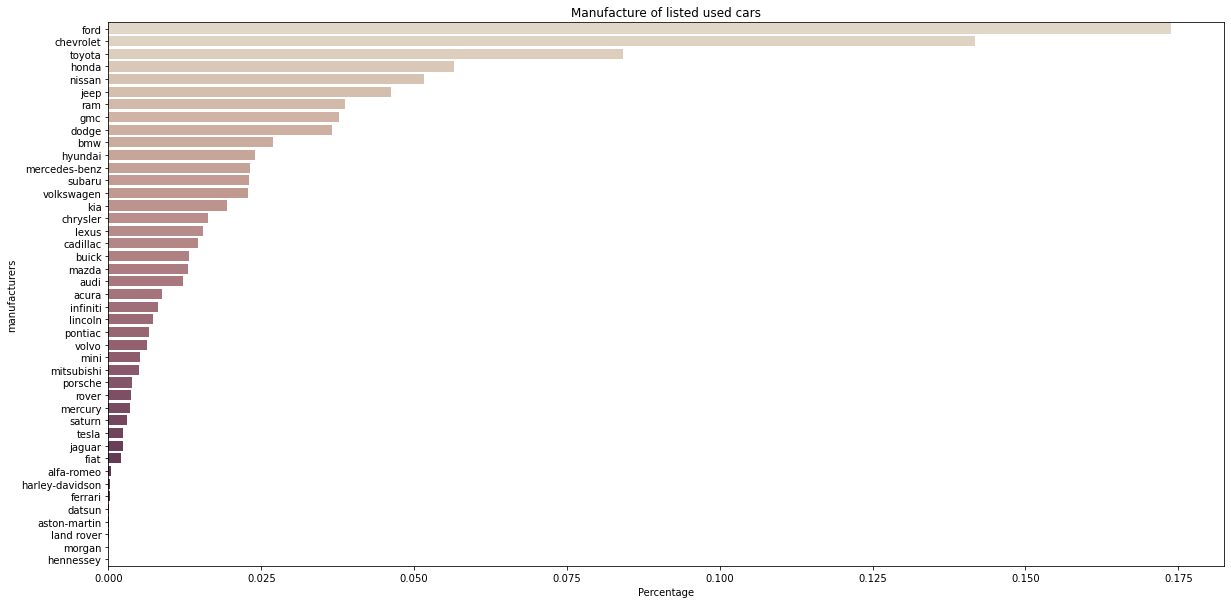

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
manufacturers = car["manufacturer"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(y=manufacturers.index, x=manufacturers.values,palette="ch:.25")
plt.title("Manufacture of listed used cars")
plt.ylabel("manufacturers")
plt.xlabel("Percentage")
plt.show()


### Distribution of Drive

In [ ]:
drive = car["drive"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(x=drive.index, y=drive.values,palette="ch:.25")
plt.title("drive types of used cars")
plt.ylabel("Percentage")
plt.xlabel("drive types")
plt.show()


4 wheel drive and front wheel drive both occupy 40% of the used-car market while rear wheel drive have about 20%.

### Distribution of type

In [ ]:
types = car["type"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(y=types.index, x=types.values,palette="ch:.25")
plt.title("types of used cars")
plt.ylabel("types")
plt.xlabel("Percentage")
plt.show()



### Distribution of used cars colors

In [ ]:
colors = car["paint_color"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(y=colors.index, x=colors.values,palette="ch:.25")
plt.title("color of listed used cars")
plt.ylabel("color")
plt.xlabel("Percentage")
plt.show()

### Odometer VS price

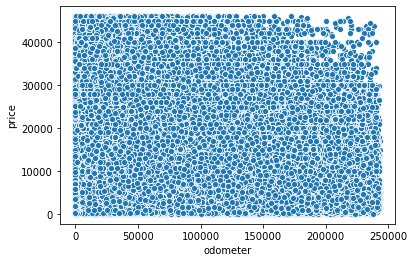

In [59]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'odometer', y = 'price', data = car)
plt.show()

### Drive Type VS Price

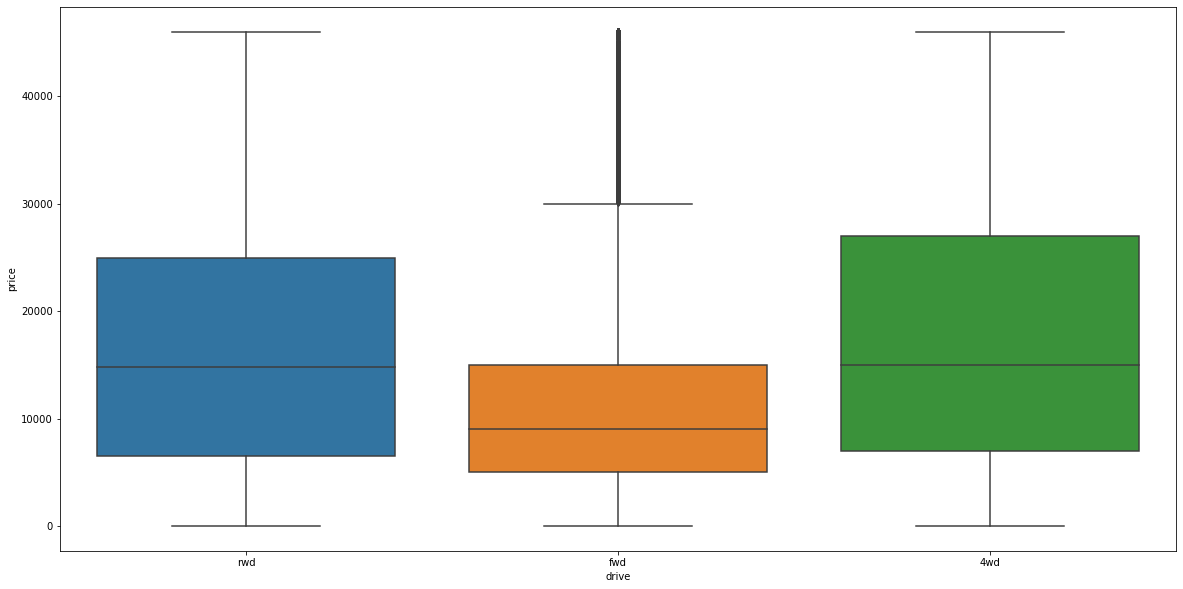

In [76]:
plt.figure(figsize=(20,10))
sns.boxplot(x="drive", y="price",data=car)
plt.show()

The price distribution of 4 wheel drive and rear wheel drive looks very similar to each other. Let's look at a violin plot.

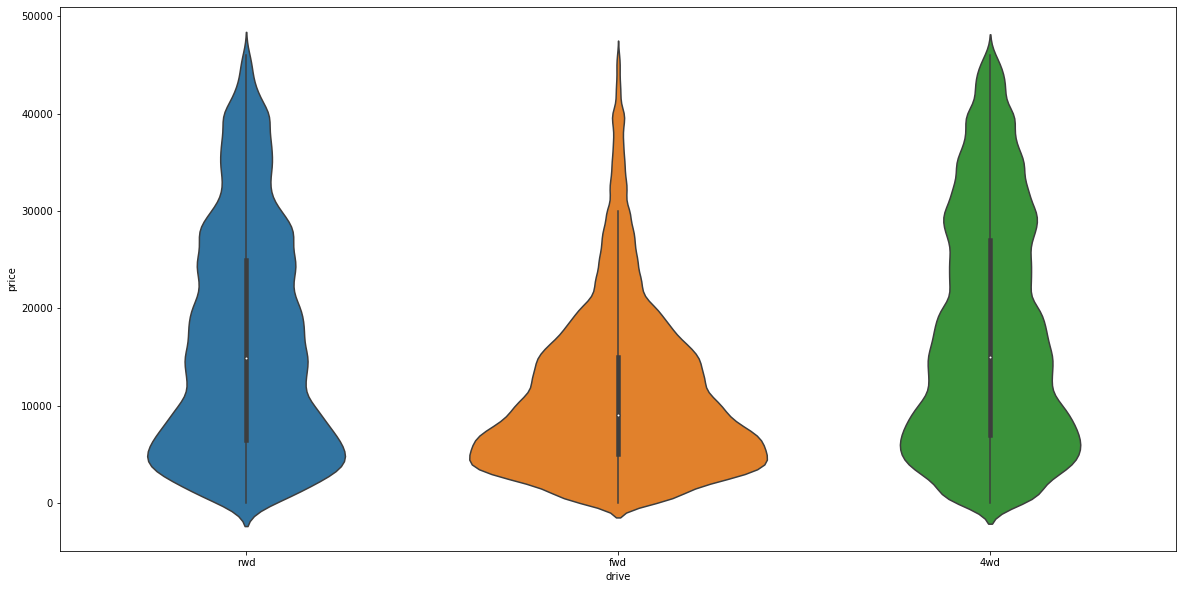

In [75]:
plt.figure(figsize=(20,10))
sns.violinplot(x="drive", y="price",data=car)
plt.show()

They are still very close to each other so we will conduct a Chi-Square Goodness Fit Test on whether the price differ by the drive types at level 0.05.

Null Hypothesis: The price is independent from the drive types: p_rwd = p_fwd = p_4wd = mean price of all used cars

Alternative Hypothesis: Null Hypothesis is false


In [134]:
#calculate mean price of all used cars
mean_price = car['price'].mean()

#mean price for specific drive type
p_rwd = car[car['drive'] == 'rwd']['price'].mean()
p_fwd = car[car['drive'] == 'fwd']['price'].mean()
p_4wd = car[car['drive'] == '4wd']['price'].mean()

In [135]:
import scipy.stats as stats
expected = [mean_price,mean_price,mean_price]
observed = [p_rwd,p_fwd,p_4wd]
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=3014.6332240110105, pvalue=0.0)

Since p-value is 0, we have sufficient evidence to suggest that price of used cars differ by the drive types at level 0.05.

In [137]:
drive_dict = {"rwd":p_rwd,"fwd":p_fwd,"4wd":p_4wd}
drive_dict

{'rwd': 16498.551229979308,
 'fwd': 11107.241725252732,
 '4wd': 17426.127021829427}

In [161]:
sorted_drive_dict = dict(sorted(drive_dict.items(), key=lambda item: item[1]))
sorted_drive_dict

{'fwd': 11107.241725252732,
 'rwd': 16498.551229979308,
 '4wd': 17426.127021829427}

### Vehicle Types VS Price

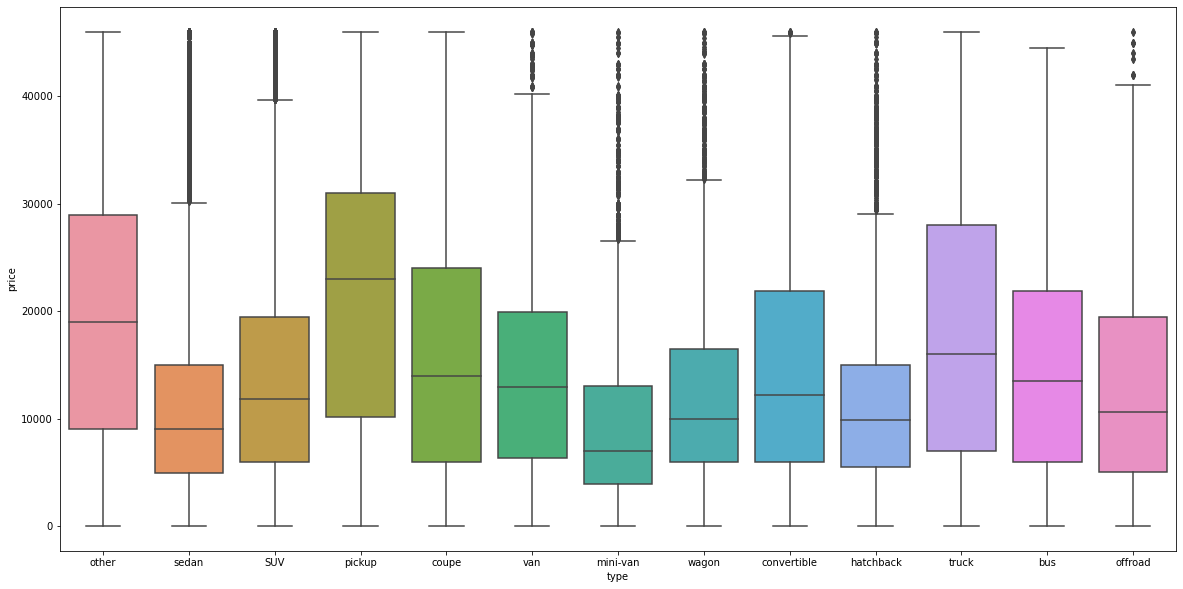

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(x="type", y="price",data = car);
plt.show()

It seems like that the car type decides the price of used cars. But let's be more careful and conduct a hypothesis test at level 0.05. Our null hypothesis will be the price of all vehicle types are the same while alternative hypothsis is the opposite.

In [140]:
car_list = ['other','sedan','SUV','pickup','coupe','van','mini-van','wagon','convertible','hatchback','truck','bus','offroad']
observed = []
expected = []
for i in car_list:
    observed.append(car[car['type'] == i]['price'].mean())
    expected.append(car['price'].mean())
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=9712.824879005098, pvalue=0.0)

p-value = 0 suggests that the price is related to the vehicle types.

We are creati

In [141]:
type_dict = {}
for i in range(0,len(observed)):
    type_dict[car_list[i]]=observed[i]
type_dict

{'other': 19704.960358249566,
 'sedan': 11219.693597034722,
 'SUV': 13970.415081841104,
 'pickup': 21520.367992803695,
 'coupe': 16134.247830279653,
 'van': 14266.493285263632,
 'mini-van': 9771.950647043897,
 'wagon': 12047.218820014936,
 'convertible': 14757.454654654655,
 'hatchback': 11261.91635697195,
 'truck': 18108.749580949847,
 'bus': 15964.452316076295,
 'offroad': 13753.831838565022}

In [162]:
sorted_type_dict = dict(sorted(type_dict.items(), key=lambda item: item[1]))
sorted_type_dict

{'mini-van': 9771.950647043897,
 'sedan': 11219.693597034722,
 'hatchback': 11261.91635697195,
 'wagon': 12047.218820014936,
 'offroad': 13753.831838565022,
 'SUV': 13970.415081841104,
 'van': 14266.493285263632,
 'convertible': 14757.454654654655,
 'bus': 15964.452316076295,
 'coupe': 16134.247830279653,
 'truck': 18108.749580949847,
 'other': 19704.960358249566,
 'pickup': 21520.367992803695}

### Paint color VS price

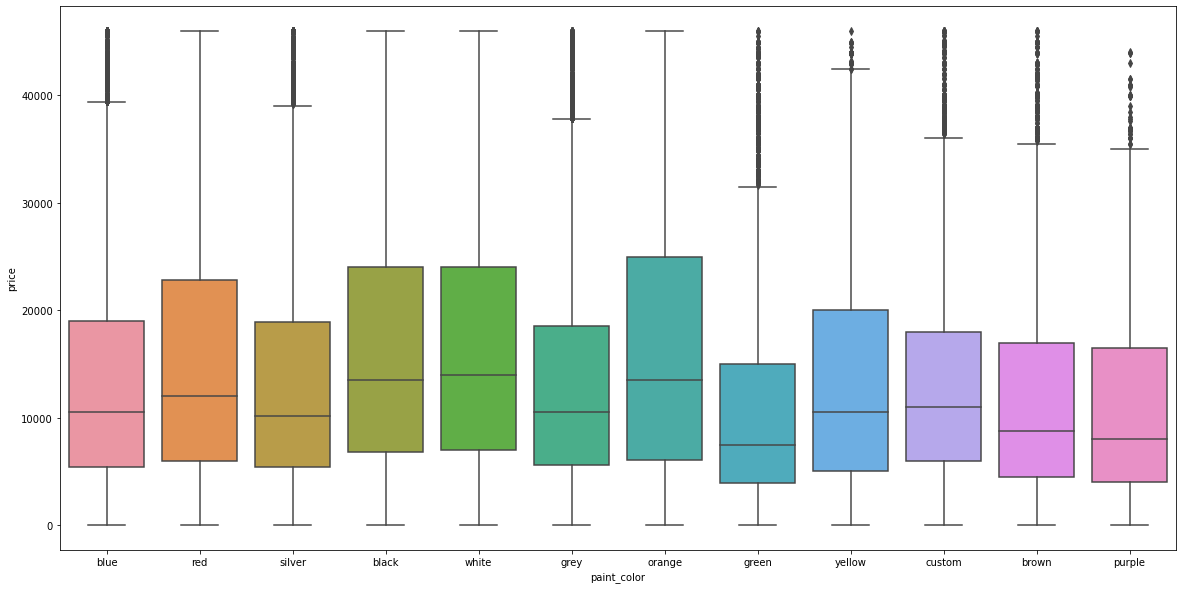

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(x="paint_color", y="price",data = car);
plt.show()

It seems like that mean price for different color of the vehicles vary. Let's conduct a Goodness fit test at level 0.05. Null hypothesis is that the prices are the same for different colors of vehicles.

In [143]:
color_list = ['blue','red','silver','black','white','grey','orange','green','yellow','custom','brown','purple']
observed = []
expected = []
for i in color_list:
    observed.append(car[car['paint_color'] == i]['price'].mean())
    expected.append(car['price'].mean())
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=3014.6332240110105, pvalue=0.0)

Another time, p-value is 0. There is sufficient evidence to suggest that the color somehow decides the price.

In [144]:
color_dict = {}
for i in range(0,len(observed)):
    color_dict[color_list[i]]=observed[i]
color_dict

{'blue': 13638.00432920915,
 'red': 15088.670727162622,
 'silver': 13325.843821291193,
 'black': 15989.27746417716,
 'white': 16352.575137020429,
 'grey': 13346.726868966934,
 'orange': 16087.891594658287,
 'green': 10931.180311401306,
 'yellow': 14106.880126182965,
 'custom': 13342.93918981268,
 'brown': 12173.75922933499,
 'purple': 11751.2375127421}

In [147]:
sorted_color_dict = dict(sorted(color_dict.items(), key=lambda item: item[1]))
sorted_color_dict

{'green': 10931.180311401306,
 'purple': 11751.2375127421,
 'brown': 12173.75922933499,
 'silver': 13325.843821291193,
 'custom': 13342.93918981268,
 'grey': 13346.726868966934,
 'blue': 13638.00432920915,
 'yellow': 14106.880126182965,
 'red': 15088.670727162622,
 'black': 15989.27746417716,
 'orange': 16087.891594658287,
 'white': 16352.575137020429}

## Prediction

Let's train some model to predict the price.

### Odometer VS Price

In [111]:
import sklearn
import numpy as np
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [114]:
#split our dataset using test set size = 0.25
#we want to inference about the price
X = car.odometer.values.reshape(-1,1)
Y = car.price.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)


Mean squared error: 91926261.70
Variance score: 0.22


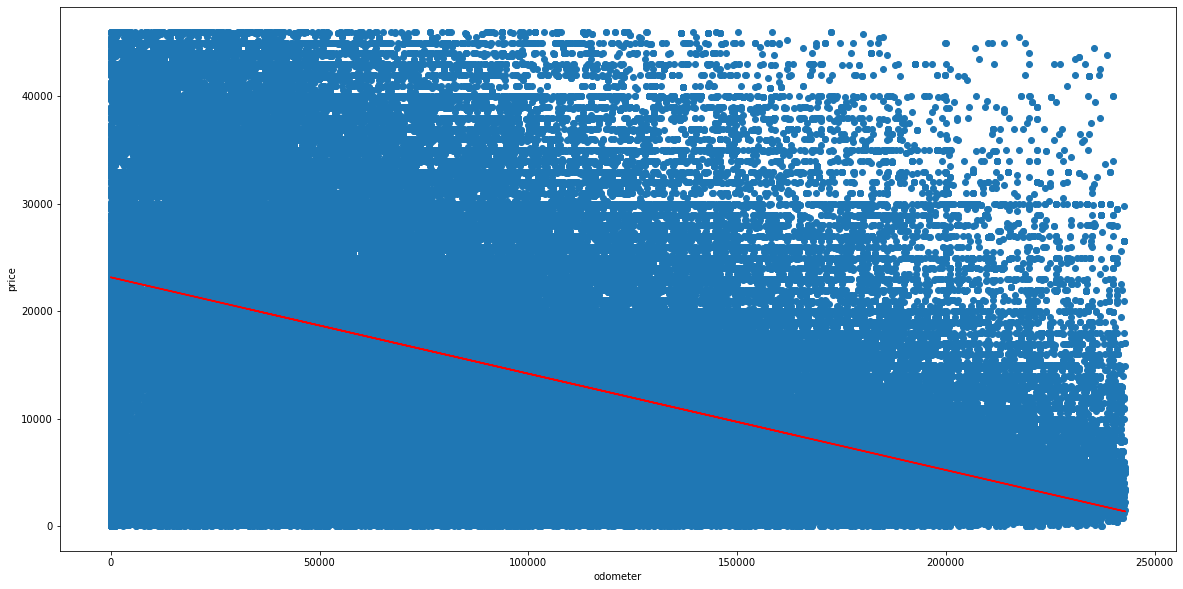

In [117]:
plt.figure(figsize=(20,10))
predict_X = lin_reg.predict(X)
plt.scatter(X,Y)
plt.plot(X,predict_X,color="red")
plt.ylabel("price")
plt.xlabel("odometer")
plt.show()

In [119]:
print("Mean squared error: %.2f" % np.mean((lin_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % lin_reg.score(X_test, y_test))

Mean squared error: 91926261.70
Coefficient of determination: 0.22


Our model performs very bad. You can clearly see that from the graph. In addition, our coefficient of determination is only 0.22, which means that 22% of the data (odometer VS price) can be explained by this linear relationship. Since the data points are all over the place, there is no good models can be used to predict price via odometer. That is, a model that's neither overfitting nor underfitting will still have poor performance. We can conclude that there is no relationship between odometer and price.

### Multiple Regression(Types, Drives, Color VS Price)

In [120]:
car.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,posting_date
0,7240372487,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,NaN,2020-12-02T08:11:30-0600
1,7240309422,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,NaN,2020-12-02T02:11:50-0600
2,7240224296,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,fwd,SUV,blue,2020-12-01T19:50:41-0600
3,7240103965,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,pickup,blue,2020-12-01T15:54:45-0600
4,7239983776,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,pickup,blue,2020-12-01T12:53:56-0600


In [163]:
drive_order = {}
for entry in sorted_drive_dict:
    drive_order[entry] = (sorted_drive_dict[entry])/10000
drive_order    

{'fwd': 1.1107241725252732,
 'rwd': 1.6498551229979308,
 '4wd': 1.7426127021829427}

In [164]:
type_order = {}
for entry in sorted_type_dict:
    type_order[entry] = (sorted_type_dict[entry])/10000
type_order   

{'mini-van': 0.9771950647043898,
 'sedan': 1.1219693597034721,
 'hatchback': 1.126191635697195,
 'wagon': 1.2047218820014935,
 'offroad': 1.3753831838565023,
 'SUV': 1.3970415081841103,
 'van': 1.4266493285263633,
 'convertible': 1.4757454654654656,
 'bus': 1.5964452316076294,
 'coupe': 1.6134247830279653,
 'truck': 1.8108749580949848,
 'other': 1.9704960358249566,
 'pickup': 2.1520367992803693}

In [160]:
color_order = {}
for entry in sorted_color_dict:
    color_order[entry] = (sorted_color_dict[entry])/10000
color_order

{'green': 1.0931180311401305,
 'purple': 1.17512375127421,
 'brown': 1.217375922933499,
 'silver': 1.3325843821291192,
 'custom': 1.334293918981268,
 'grey': 1.3346726868966934,
 'blue': 1.363800432920915,
 'yellow': 1.4106880126182966,
 'red': 1.508867072716262,
 'black': 1.5989277464177158,
 'orange': 1.6087891594658288,
 'white': 1.6352575137020429}

In [165]:
import category_encoders as ce

cleanup_nums = {"drive":     {'fwd': 1.1107241725252732,'rwd': 1.6498551229979308,'4wd': 1.7426127021829427},
                "paint_color": {'green': 1.0931180311401305, 'purple': 1.17512375127421,'brown': 1.217375922933499,
                                'silver': 1.3325843821291192,'custom': 1.334293918981268,'grey': 1.3346726868966934,
                                'blue': 1.363800432920915,'yellow': 1.4106880126182966,'red': 1.508867072716262,
                                'black': 1.5989277464177158,'orange': 1.6087891594658288,'white': 1.6352575137020429},
                "type": {'mini-van': 0.9771950647043898,'sedan': 1.1219693597034721,'hatchback': 1.126191635697195,
                         'wagon': 1.2047218820014935,'offroad': 1.3753831838565023,'SUV': 1.3970415081841103,
                         'van': 1.4266493285263633,'convertible': 1.4757454654654656,'bus': 1.5964452316076294,
                         'coupe': 1.6134247830279653,'truck': 1.8108749580949848,'other': 1.9704960358249566,
                         'pickup': 2.1520367992803693}}

test_df = car.replace(cleanup_nums)
test_df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,posting_date
0,7240372487,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,1.649855,1.970496,NaN,2020-12-02T08:11:30-0600
1,7240309422,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,1.110724,1.121969,NaN,2020-12-02T02:11:50-0600
2,7240224296,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,1.110724,1.397042,1.3638,2020-12-01T19:50:41-0600
3,7240103965,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,1.649855,2.152037,1.3638,2020-12-01T15:54:45-0600
4,7239983776,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,1.742613,2.152037,1.3638,2020-12-01T12:53:56-0600


In [168]:
test_df['paint_color'] = test_df['paint_color'].fillna(0)
test_df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,posting_date
0,7240372487,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,1.649855,1.970496,0.0000,2020-12-02T08:11:30-0600
1,7240309422,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,1.110724,1.121969,0.0000,2020-12-02T02:11:50-0600
2,7240224296,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,1.110724,1.397042,1.3638,2020-12-01T19:50:41-0600
3,7240103965,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,1.649855,2.152037,1.3638,2020-12-01T15:54:45-0600
4,7239983776,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,1.742613,2.152037,1.3638,2020-12-01T12:53:56-0600


In [174]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400067 entries, 0 to 458212
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            400067 non-null  int64  
 1   price         400067 non-null  int64  
 2   year          399355 non-null  float64
 3   manufacturer  386177 non-null  object 
 4   model         396131 non-null  object 
 5   condition     241403 non-null  object 
 6   cylinders     255801 non-null  object 
 7   fuel          397732 non-null  object 
 8   odometer      400067 non-null  float64
 9   transmission  398440 non-null  object 
 10  drive         400067 non-null  float64
 11  type          400067 non-null  float64
 12  paint_color   400067 non-null  float64
 13  posting_date  400045 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 55.8+ MB


In [177]:
#split our dataset using test set size = 0.25
#we want to inference about the price
#X = car.odometer.values.reshape(-1,1)
X = test_df[['drive','type','paint_color']]
#Y = car.price.values.reshape(-1,1)
Y = test_df.price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [171]:
print("Mean squared error: %.2f" % np.mean((lin_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % lin_reg.score(X_test, y_test))

Mean squared error: 100762296.86
Coefficient of determination: 0.15


In [178]:
import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                 2.267e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:41:28   Log-Likelihood:            -4.2559e+06
No. Observations:              400067   AIC:                         8.512e+06
Df Residuals:                  400063   BIC:                         8.512e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.651e+04    176.742    -93.404      

In [179]:

#split our dataset using test set size = 0.25
#we want to inference about the price
#X = car.odometer.values.reshape(-1,1)
X = test_df[['odometer','drive','type','paint_color']]
#Y = car.price.values.reshape(-1,1)
Y = test_df.price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 5.494e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:42:05   Log-Likelihood:            -4.1997e+06
No. Observations:              400067   AIC:                         8.399e+06
Df Residuals:                  400062   BIC:                         8.399e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5180.0324    156.778    -33.041      

# Conclusion